In [ ]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import math

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
print('Libraries imported successfully!')

ibmqfactory.load_account:WARNING:2022-02-24 02:43:09,167: Credentials are already in use. The existing account in the session will be replaced.


In [187]:
def initQC(maxVal_ones, maxVal_tenths, num_of_places):
    ones_bits = int(math.log(maxVal_ones+1, 2))
    tenths_bits = int(math.log(maxVal_tenths+1, 2))
    total_bits = ones_bits + tenths_bits*num_of_places
    
    qc = QuantumCircuit(total_bits, total_bits)
    return qc, int(total_bits)

def demoManipulate(qc, num_of_bits):
    for qubit_idx in range(num_of_bits):
        if qubit_idx%4 == 1:
            qc.x(qubit_idx)
    #qc.x([i for i in range(11)])
    qc.measure_all()
    return qc

def constructDec():
    # 3, 7, 3
    qc, numOfBits = initQC(3, 7, 3)
    demoManipulate(qc, numOfBits)
    
    return qc

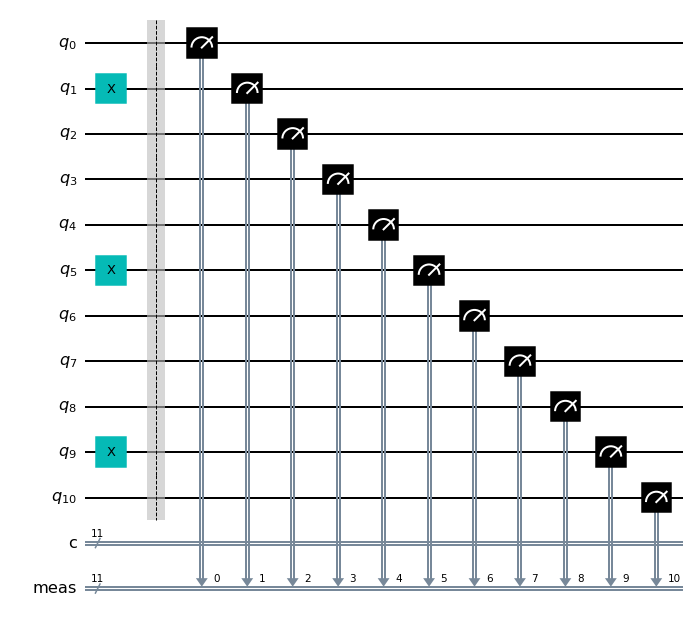

In [188]:
myQC = constructDec()
myQC.draw()

In [189]:
backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
job = execute(myQC,backend, shots = 1024) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()

counts = result.get_counts()
print(counts)
#plot_histogram(counts)

{'01000100010 00000000000': 1024}


In [190]:
for key in counts.keys():
    thousandths_place_digit = int(key[8:11][::-1])
    hundredths_place_digit = int(key[5:8][::-1])
    tenths_place_digit = int(key[2:5][::-1])
    ones_place_digit = int(key[0:2][::-1])
print(ones_place_digit, tenths_place_digit, hundredths_place_digit, thousandths_place_digit)

10 0 1 10


In [191]:
def binaryToDecimal(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal  

In [192]:
binOnes = str(binaryToDecimal(ones_place_digit))
binTenths = str(binaryToDecimal(tenths_place_digit))
binHundreths = str(binaryToDecimal(hundredths_place_digit))
binThousandths = str(binaryToDecimal(thousandths_place_digit))

In [193]:
number = float(str(binOnes+"."+binTenths+binHundreths+binThousandths))
number

2.012